<a href="https://colab.research.google.com/github/Ramyasri2407/Machine-learning-/blob/main/black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/100], Loss: 5.3710
Epoch [20/100], Loss: 4.3340
Epoch [30/100], Loss: 3.3782
Epoch [40/100], Loss: 2.5377
Epoch [50/100], Loss: 1.8704
Epoch [60/100], Loss: 1.3638
Epoch [70/100], Loss: 1.0291
Epoch [80/100], Loss: 0.8441
Epoch [90/100], Loss: 0.7518
Epoch [100/100], Loss: 0.7075
Mean Squared Error on Test Set: 0.7169


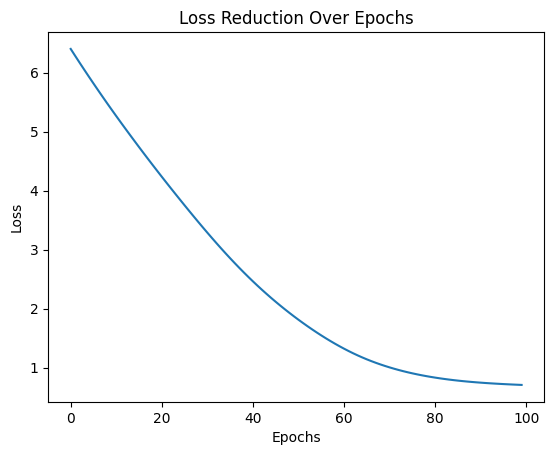

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Normalize features
scaler = StandardScaler()
X = df.drop(columns='target').values
y = df['target'].values

X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Build the Regression Model
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Instantiate the model
input_dim = X_train.shape[1]  # number of features
model = HousePriceModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss value for visualization
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    print(f'Mean Squared Error on Test Set: {mse:.4f}')

# Plot loss reduction over epochs
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Epochs')
plt.show()
